In [2]:
import math
import numpy as np
import openrtdynamics2.lang as dy
import openrtdynamics2.py_execute as dyexe
from openrtdynamics2.ORTDtoNumpy import ORTDtoNumpy

In [2]:
cpp_class_code = """

class SomeClass {
public:

    int x;
    
    void reset() {
        x = 0;
    }
    
    void return_output_signals(double & output1, double & output2, double input) {
    
        output1 = input;
        output2 = 2.0 * x;
        
    }
    
    void update_states(double input) {
        x = x + input;
    }

};

typedef SomeClass *SomeClassPtr;
"""

In [3]:
dy.clear()

system = dy.enter_system()


class_ptr_datatype = dy.DataTypePointer( cpp_type_name_class = 'SomeClass' )  
class_ptr = dy.cpp_allocate_class( datatype=class_ptr_datatype, code_constructor_call='SomeClass()' )

class_ptr.set_name('pointer').set_blockname('pointer_source')

u = dy.float64(1.0)

outputs = dy.cpp_call_class_member_function(
    ptr_signal = class_ptr,

    input_signals=[ u ],
    input_types=[ dy.DataTypeFloat64(1) ],
    output_types=[ dy.DataTypeFloat64(1), dy.DataTypeFloat64(1) ],

    member_function_name_to_calc_outputs  = 'return_output_signals',
    member_function_name_to_update_states = 'update_states'
)

output1 = outputs[0]
output2 = outputs[1]

# define output(s)
dy.append_primay_ouput(output1, 'output1')
dy.append_primay_ouput(output2, 'output2')

# generate code for Web Assembly (wasm), requires emcc (emscripten) to build
code_gen_results = dy.generate_code(template=dy.TargetWasm(), folder="generated/custom_cpp", build=False, include_code_list=[cpp_class_code])

compiling system simulation (level 0)... 
determining the computation order...
building execution paths...
All dependencies are resolved.
Generated code will be written to generated/custom_cpp .


In [4]:
compiled_system = dyexe.CompiledCode(code_gen_results)
testsim = dyexe.SystemInstance(compiled_system)

In [5]:
# NBVAL_CHECK_OUTPUT
sim_results = dyexe.run_batch_simulation(testsim, input_data={}, N=10 )
sim_results['output1']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
# NBVAL_CHECK_OUTPUT
sim_results['output2']

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [7]:
# show the generated source code
from IPython.display import Code
Code(data=code_gen_results['algorithm_sourcecode'], language='c++')

// custom code


class SomeClass {
public:

    int x;
    
    void reset() {
        x = 0;
    }
    
    void return_output_signals(double & output1, double & output2, double input) {
    
        output1 = input;
        output2 = 2.0 * x;
        
    }
    
    void update_states(double input) {
        x = x + input;
    }

};

typedef SomeClass *SomeClassPtr;

// end of custom code

// namespace for simulation {
  // global variables

  class simulation {
    public:


    // state update
    SomeClass block_pointer_source_instance = SomeClass();
    SomeClassPtr block_pointer_source_ptr = &block_pointer_source_instance;


    //
    // cached output values
    //

    double s2__block_2;
    SomeClassPtr s1_pointer__block_pointer_source;
    double output1__block_3;
    double output2__block_3;

    // API-function resetStates
    void resetStates() { // created by cpp_define_function

      block_pointer_source_ptr->reset();
    }
    // output signals of  resetStates
    struct Outputs_resetStates{
      ;

    };
    // input signals of resetStates
    struct Inputs_resetStates{
      ;

    };
    // wrapper function for resetStates
    Outputs_resetStates resetStates__(Inputs_resetStates inputs) {
      Outputs_resetStates outputs;

      resetStates();

      return outputs;
    }
    // API-function updateStates
    void updateStates() { // created by cpp_define_function


      // restoring the signals s2, s1_pointer, output1, output2 from the states 
      double &s2 = s2__block_2;
      SomeClassPtr &s1_pointer = s1_pointer__block_pointer_source;
      double &output1 = output1__block_3;
      double &output2 = output2__block_3;


      // calculating the block outputs in the following order 
      // that depend on 
      // dependencies that require a state update are  


      { // calling the custom c++ function s1_pointer->update_states
        s1_pointer->update_states(s2);
      }
    }
    // output signals of  updateStates
    struct Outputs_updateStates{
      ;

    };
    // input signals of updateStates
    struct Inputs_updateStates{
      ;

    };
    // wrapper function for updateStates
    Outputs_updateStates updateStates__(Inputs_updateStates inputs) {
      Outputs_updateStates outputs;

      updateStates();

      return outputs;
    }
    // API-function calcResults_1 to compute: output1, output2
    void calcResults_1(double &output1, double &output2) { // created by cpp_define_function
      double s2;
      SomeClassPtr s1_pointer;


      // calculating the block outputs in the following order s2, s1_pointer, output1, output2
      // that depend on 
      // dependencies that require a state update are s2, s1_pointer 

      s2 = 1.0;
      s1_pointer = block_pointer_source_ptr;
      { // calling the custom c++ function s1_pointer->return_output_signals
        double block_3_out0;
        double block_3_out1;
        s1_pointer->return_output_signals(block_3_out0, block_3_out1, s2);
        output1 = block_3_out0;
        output2 = block_3_out1;
      }

      // saving the signals s2, s1_pointer, output1, output2 into the states 
      s2__block_2 = s2;
      s1_pointer__block_pointer_source = s1_pointer;
      output1__block_3 = output1;
      output2__block_3 = output2;
    }
    // output signals of  calcResults_1
    struct Outputs_calcResults_1{
      double output1;
      double output2;

    };
    // input signals of calcResults_1
    struct Inputs_calcResults_1{
      ;

    };
    // wrapper function for calcResults_1
    Outputs_calcResults_1 calcResults_1__(Inputs_calcResults_1 inputs) {
      Outputs_calcResults_1 outputs;

      calcResults_1(outputs.output1, outputs.output2);

      return outputs;
    }
    // all system inputs and outputs combined
    struct Inputs{
      ;

    };
    struct Outputs{
      double output1;
      double output2;

    };
    // main step function 
    void step(Outputs & outputs, Inputs const & inputs, int calculate_outputs, bo

# A more complex example 

    - using dynamic updates

In [8]:
cpp_class_code = """

class SharedStates {
public:

    double *state_memory;
    int n;

    SharedStates(int n) {
        this->state_memory = new double[n];
        this->n = n;
    }
    
    ~SharedStates() {
        delete[] this->state_memory;
    }

    void reset() {
        for (int i = 0; i < n; ++i) {
            state_memory[i] = 0;
        }
    }
    
    void read_from_index(double & output, int index) {
    
        output = state_memory[index];
        
    }
    
    void write_to_index(int index, double value) {
        state_memory[index] = value;
    }

};

typedef SharedStates *SharedStatesPtr;
"""

### wrapper functions

Introduce wrapper functions for convinience.

In [9]:
def read_from_index(shared_states_ptr, index):
    
    value = dy.cpp_call_class_member_function(
        ptr_signal = shared_states_ptr,

        input_signals=[ index ],
        input_types=[ dy.DataTypeInt32(1) ],
        output_types=[ dy.DataTypeFloat64(1) ],

        # call the function read_from_index        
        member_function_name_to_calc_outputs  = 'read_from_index'
    )
    
    return value[0]


def write_to_index(shared_states_ptr, index, value_to_write):
    
    dy.cpp_call_class_member_function(
        ptr_signal = shared_states_ptr,

        input_signals=[ index, value_to_write ],
        input_types=[ dy.DataTypeInt32(1), dy.DataTypeFloat64(1) ],
        output_types=[],

        # call the function write_to_index on *state update*
        member_function_name_to_update_states = 'write_to_index'
    )
    

In [10]:
dy.clear()

system = dy.enter_system()

# allocate the class SharedStates
shared_states_ptr_datatype = dy.DataTypePointer( cpp_type_name_class = 'SharedStates' )  
shared_states_ptr = dy.cpp_allocate_class( datatype=shared_states_ptr_datatype, code_constructor_call='SharedStates(100)' )

# example input signals
index, _ = dy.counter_triggered(upper_limit=2, reset_on_limit=True)
sinus_signal = dy.signal_sinus(10, 0)

# calls to the custom code
write_to_index(shared_states_ptr, index, sinus_signal)
output = read_from_index(shared_states_ptr, index)

# define output(s)
dy.append_primay_ouput(output, 'output')
dy.append_primay_ouput(sinus_signal, 'sinus_signal')
dy.append_primay_ouput(index, 'index')

# generate code for Web Assembly (wasm), requires emcc (emscripten) to build
code_gen_results = dy.generate_code(template=dy.TargetWasm(), folder="generated/custom_cpp", build=False, include_code_list=[cpp_class_code])

compiling system simulation (level 0)... 
determining the computation order...
building execution paths...
All dependencies are resolved.
Generated code will be written to generated/custom_cpp .


### Simulate

In [11]:
compiled_system = dyexe.CompiledCode(code_gen_results)
testsim = dyexe.SystemInstance(compiled_system)

In [12]:
# NBVAL_CHECK_OUTPUT
sim_results = dyexe.run_batch_simulation(testsim, input_data={}, N=20 )
sim_results['sinus_signal']

array([ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01,  0.00000000e+00,  5.87785252e-01,
        9.51056516e-01,  9.51056516e-01,  5.87785252e-01,  1.22464680e-16,
       -5.87785252e-01, -9.51056516e-01, -9.51056516e-01, -5.87785252e-01])

In [13]:
# NBVAL_CHECK_OUTPUT
sim_results['output']

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.87785252e-01,  9.51056516e-01,  9.51056516e-01,  5.87785252e-01,
        1.22464680e-16, -5.87785252e-01, -9.51056516e-01, -9.51056516e-01,
       -5.87785252e-01,  0.00000000e+00,  5.87785252e-01,  9.51056516e-01,
        9.51056516e-01,  5.87785252e-01,  1.22464680e-16, -5.87785252e-01])

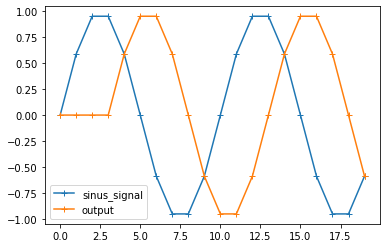

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot( sim_results['sinus_signal'], '+-' )
plt.plot( sim_results['output'], '+-' )
plt.legend(['sinus_signal', 'output'])
plt.show()

In [15]:
# show the generated source code
from IPython.display import Code
Code(data=code_gen_results['algorithm_sourcecode'], language='c++')

// custom code


class SharedStates {
public:

    double *state_memory;
    int n;

    SharedStates(int n) {
        this->state_memory = new double[n];
        this->n = n;
    }
    
    ~SharedStates() {
        delete this->state_memory;
    }

    void reset() {
        for (int i = 0; i < n; ++i) {
            state_memory[i] = 0;
        }
    }
    
    void read_from_index(double & output, int index) {
    
        output = state_memory[index];
        
    }
    
    void write_to_index(int index, double value) {
        state_memory[index] = value;
    }

};

typedef SharedStates *SharedStatesPtr;

// end of custom code

// namespace for simulation {
  // global variables

  class simulation {
    public:


    // state update
    int32_t block_23_mem;
    int32_t block_12_mem;
    SharedStates block_1_instance = SharedStates(100);
    SharedStatesPtr block_1_ptr = &block_1_instance;


    // state update
    bool block_18_state;
    bool block_7_state;


    //
    // cached output values
    //

    int32_t s23__block_23;
    double s24__block_24;
    double s25__block_25;
    int32_t s26__block_26;
    double s27__block_27;
    double sinus_signal__block_28;
    int32_t index__block_12;
    SharedStatesPtr s1__block_1;
    double output__block_30;

    // API-function resetStates
    void resetStates() { // created by cpp_define_function

      block_23_mem = 0;
      block_12_mem = 0;
      block_1_ptr->reset();
      block_18_state = false;
      block_7_state = false;
    }
    // output signals of  resetStates
    struct Outputs_resetStates{
      ;

    };
    // input signals of resetStates
    struct Inputs_resetStates{
      ;

    };
    // wrapper function for resetStates
    Outputs_resetStates resetStates__(Inputs_resetStates inputs) {
      Outputs_resetStates outputs;

      resetStates();

      return outputs;
    }
    // API-function updateStates
    void updateStates() { // created by cpp_define_function
      int32_t s13;
      bool s17;
      bool s16;
      bool s18_paused;
      int32_t s19_stepwidth;
      int32_t s14;
      bool s15;
      int32_t s20;
      int32_t s21;
      int32_t s22;
      int32_t s2;
      bool s6;
      bool s5;
      bool s7_paused;
      int32_t s8_stepwidth;
      int32_t s3;
      bool s4;
      int32_t s9;
      int32_t s10;
      int32_t s11;


      // restoring the signals s23, s24, s25, s26, s27, sinus_signal, index, s1, output from the states 
      int32_t &s23 = s23__block_23;
      double &s24 = s24__block_24;
      double &s25 = s25__block_25;
      int32_t &s26 = s26__block_26;
      double &s27 = s27__block_27;
      double &sinus_signal = sinus_signal__block_28;
      int32_t &index = index__block_12;
      SharedStatesPtr &s1 = s1__block_1;
      double &output = output__block_30;


      // calculating the block outputs in the following order s13, s17, s16, s18_paused, s19_stepwidth, s14, s15, s20, s21, s22, s2, s6, s5, s7_paused, s8_stepwidth, s3, s4, s9, s10, s11
      // that depend on 
      // dependencies that require a state update are s17, s16, s6, s5 

      s13 = 1;
      s17 = 0;
      s16 = 0;
      s18_paused = block_18_state;
      s18_paused = s17 ? true : s18_paused;
      s18_paused = s16 ? false : s18_paused;
      if (s18_paused) {
        s19_stepwidth = 0;
      } else {
        s19_stepwidth = s13;
      }
      s14 = 9;
      s15 = s23 >= s14;
      if (s15) {
        s20 = 0;
      } else {
        s20 = s19_stepwidth;
      }
      s21 = s23 + s20;
      if (s15) {
        s22 = 0;
      } else {
        s22 = s21;
      }
      s2 = 1;
      s6 = 0;
      s5 = 0;
      s7_paused = block_7_state;
      s7_paused = s6 ? true : s7_paused;
      s7_paused = s5 ? false : s7_paused;
      if (s7_paused) {
        s8_stepwidth = 0;
      } else {
        s8_stepwidth = s2;
      }
      s3 = 2;
      s4 = index >= s3;
      if (s4) {
        s9 = 0;
      } else {
        s9 = s8_stepwidth;
      }
      s10 = index + s9;
  

In [1]:
import math
import numpy as np
import openrtdynamics2.lang as dy
import openrtdynamics2.py_execute as dyexe
from openrtdynamics2.ORTDtoNumpy import ORTDtoNumpy

# Ringbuffer

In [2]:
cpp_class_code = """

class Ringbuffer {
public:

    double *state_memory;
    int n, write_cnt, abs_cnt;

    Ringbuffer(int n) {
    
        this->state_memory = new double[n];
        this->n         = n;
        this->write_cnt = 0;
        this->abs_cnt   = 0;
        
        printf("p%p ", (void*) this->state_memory );
    }
    
    ~Ringbuffer() {
    
        delete[] this->state_memory;
    }

    void reset() {

        printf("p%p ", (void*) this->state_memory );
    
        this->write_cnt = 0;
        this->abs_cnt   = 0;

        for (int i = 0; i < n; ++i) {
        
            printf("w%d ", i);

            state_memory[i] = 0;
        }
    }
    
    void get_current_absolute_write_index(int & index) {
        index = this->abs_cnt;
    }
    
    void read_from_absolute_index(double & output, int abs_index) {
    
        int diff = this->abs_cnt - abs_index; // >= 0
    
        int arr_index = this->write_cnt - diff;
        
        if (arr_index < 0) {
          arr_index = this->n - (-arr_index);
        }
        
        if (arr_index >= this->n) { // check this
        
            // error
            output = NAN;
            
        } else if ( arr_index < 0 ) {
        
            // error
            output = NAN;
            
        } else {
        
            printf("r%d ", arr_index );
            printf("p%p ", (void*) this->state_memory );
        
            output = state_memory[ arr_index ];
            
            // output = arr_index * 1.0; 
        }
        
        // output = arr_index;
    }
    
    void append_to_buffer(double value) {
    
        printf("w%d ", this->write_cnt );
        printf("p%p ", (void*) this->state_memory );
    
        state_memory[ this->write_cnt ] = value;
        
        this->abs_cnt++;
        this->write_cnt++;
        
        if (this->write_cnt >= this->n) {
        
            // wrap
            this->write_cnt = 0;
        }
    }

};

typedef Ringbuffer *RingbufferPtr;
"""

In [3]:
def read_from_absolut_index(shared_states_ptr, index):
    
    value = dy.cpp_call_class_member_function(
        ptr_signal    = shared_states_ptr,

        input_signals = [ index ],
        input_types   = [ dy.DataTypeInt32(1) ],
        output_types  = [ dy.DataTypeFloat64(1) ],

        # call the function read_from_index        
        member_function_name_to_calc_outputs = 'read_from_absolute_index'
    )
    
    return value[0]



def get_current_absolute_write_index(shared_states_ptr):
    
    value = dy.cpp_call_class_member_function(
        ptr_signal    = shared_states_ptr,

        input_signals = [  ],
        input_types   = [  ],
        output_types  = [ dy.DataTypeInt32(1) ],

        # call the function read_from_index        
        member_function_name_to_calc_outputs = 'get_current_absolute_write_index'
    )
    
    return value[0]


def append_to_buffer(shared_states_ptr, value_to_write):
    
    dy.cpp_call_class_member_function(
        ptr_signal    = shared_states_ptr,

        input_signals = [ value_to_write ],
        input_types   = [ dy.DataTypeFloat64(1) ],
        output_types  = [  ],

        # call the function write_to_index on *state update*
        member_function_name_to_update_states = 'append_to_buffer'
    )
    

In [4]:
dy.clear()

system = dy.enter_system()

# allocate the class SharedStates
shared_states_ptr_datatype = dy.DataTypePointer( cpp_type_name_class = 'Ringbuffer' )  
shared_states_ptr          = dy.cpp_allocate_class( datatype=shared_states_ptr_datatype, code_constructor_call='Ringbuffer(100)' )

# example input signals
index1       = dy.saturate( dy.counter() - 10, lower_limit=0 )
index2       = dy.saturate( dy.counter() - 20, lower_limit=0 )
sinus_signal = dy.signal_sinus(40, 0)

# calls to the custom code
append_to_buffer(shared_states_ptr, sinus_signal)
output1 = read_from_absolut_index(shared_states_ptr, index1)
output2 = read_from_absolut_index(shared_states_ptr, index2)

write_index = get_current_absolute_write_index(shared_states_ptr)

# define output(s)
dy.append_primay_ouput(output1,       'output1')
dy.append_primay_ouput(output2,       'output2')
dy.append_primay_ouput(sinus_signal,  'sinus_signal')
dy.append_primay_ouput(index1,        'index1')
dy.append_primay_ouput(write_index,   'write_index')



# generate code for Web Assembly (wasm), requires emcc (emscripten) to build
code_gen_results = dy.generate_code(template=dy.TargetBasicExecutable(i_max=120,), folder="generated/custom_cpp", build=False, include_code_list=[cpp_class_code])

compiling system simulation (level 0)... 
determining the computation order...
building execution paths...
All dependencies are resolved.
Generated code will be written to generated/custom_cpp .


In [5]:
compiled_system = dyexe.CompiledCode(code_gen_results)
testsim = dyexe.SystemInstance(compiled_system)

In [8]:
# NBVAL_CHECK_OUTPUT
sim_results = dyexe.run_batch_simulation(testsim, input_data={}, N=120 )

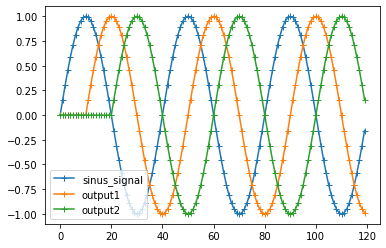

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119.])

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot( sim_results['sinus_signal'], '+-' )
plt.plot( sim_results['output1'], '+-' )
plt.plot( sim_results['output2'], '+-' )
plt.legend(['sinus_signal', 'output1', 'output2'])
plt.show()

sim_results['write_index']

In [ ]:

@ORTDtoNumpy()
def ringbuffer_test(signal):
    # allocate the class SharedStates
    shared_states_ptr_datatype = dy.DataTypePointer( cpp_type_name_class = 'Ringbuffer' )  
    shared_states_ptr          = dy.cpp_allocate_class( datatype=shared_states_ptr_datatype, code_constructor_call='Ringbuffer(100)' )

    # example input signals
    index        = dy.saturate( dy.counter() - 10, lower_limit=0 )
    # sinus_signal = dy.signal_sinus(10, 0)

    # calls to the custom code
    append_to_buffer(shared_states_ptr, signal)
    output = read_from_absolut_index(shared_states_ptr, index)
    
    # output.set_name('output')
    
    
    return output, index




In [ ]:
ouput, index = ringbuffer_test( np.sin( np.linspace(0,math.pi*5, 200) ) )